#### STAGE1 Project
#### Alex Phoummalayvane
#### Fitting Curves to Data Project

1. Copy the Point2D struct from your homework and Chapter 17a into your module. This should be parametric
like was discussed in Chapter 17a. That is it should have a single type and if the two points that are passed in
are different types, you need to convert.

In [320]:
mutable struct Point2D{T <: Real}
    x::T
    y::T
end

In [321]:
#method to write the point in standard form
Base.show(io::IO, pt::Point2D) = print(io, string("(", pt.x,",", pt.y, ")"))

In [322]:
point2D_test = Point2D(1, 4)

(1,4)

In [323]:
#this is to make x and y points of the Point2D object to be the same type if they are different
Point2D(x::Real, y::Real) = Point2D(promote(x,y)...)

Point2D

In [324]:
point2D_test = Point2D(1, 4.0)

(1.0,4.0)

In [259]:
point2D_test = Point2D(1.4, 4.0)

(1.4,4.0)

2. Create a new data type called XYData that stores a vector Point2D objects from your homework. You should
do this parametrically and the types of data for x and y should be the same and a subset of Real.


In [310]:
mutable struct XYData
    #stores vector of Point2D objects
    vertices::Vector{Point2D{T}} where T <: Real
    
    #constructor to take vector of xpts and vector of ypts
    function XYData(xpts::Vector{T}, ypts::Vector{T}) where T <: Real 
        #throws errow if xpts and ypts are diff size 
        length(xpts) == length(ypts)  || throw(ArgumentError("The x and y vectors are not the same size"))
        new(map((x,y) -> Point2D(x,y), xpts, ypts))
    end 
    
    #constructor to take vector of tuples
    #stil trying to get this to work and tried alot. 
    function XYData(tups::Vector{Tuple{T,T}}) where T <: Real
        new(map((Tuple) -> Point2D(Tuple{T,T}), tups))
    end 
    
    #Create a constructor that creates a new XYData object from two vectors of the same length but different types (like integers and floats).
    function XYData(xpts::Vector{T}, ypts::Vector{S}) where {T <: Real, S <:Real}
        
    #throws errow if xpts and ypts are diff size 
    length(xpts) == length(ypts)  || throw(ArgumentError("The x and y vectors are not the same size"))
    new(map((x,y) -> Point2D(x,y), xpts, ypts))
    end
    

     
end



#https://docs.julialang.org/en/v1/manual/constructors/
    

LoadError: syntax: invalid identifier name "..."

In [312]:
#this is working. Trying to  create vector of tuples and there is problem with the constructor
test_vectorTuples = XYData([(1,2), (4,2), (6,7)])

LoadError: TypeError: in Type{...} expression, expected UnionAll, got a value of type Tuple{Int64, Int64}

In [158]:
vector_ypts_floats = [3.1, 3.2, 0.0, 0.1]

4-element Vector{Float64}:
 3.1
 3.2
 0.0
 0.1

In [157]:
vector_xpts_ints = [0, 4, 4, 0]

4-element Vector{Int64}:
 0
 4
 4
 0

In [159]:
#test for constructing XYData object from two vectors of same length but diff type
vector_diff_types = XYData(vector_xpts_ints, vector_ypts_floats)

[(0.0,3.1),(4.0,3.2),(4.0,0.0),(0.0,0.1)]

In [38]:
#example professor gave
map((i,j)->i*j, [2, 5, 6], [3,5,9])

3-element Vector{Int64}:
  6
 25
 54

In [142]:
vector_xpts = [0, 4, 4, 0]

4-element Vector{Int64}:
 0
 4
 4
 0

In [143]:
vector_ypts = [3, 3, 0, 0]

4-element Vector{Int64}:
 3
 3
 0
 0

In [144]:
plot_test = XYData(vector_xpts, vector_ypts)

[(0,3),(4,3),(4,0),(0,0)]

In [26]:
using RecipesBase, Plots

2a. Create a default inner constructor that takes a vector of Point2D objects.


2b. Create a constructor that creates a new XYData object from two vectors of reals of the same length (each
vector should be the same subtype of real).

2c. Create a constructor that creates a new XYData object from a vector of tuples. Consider tuples of the
same and different types.


2d. Create a constructor that creates a new XYData object from two vectors of the same length but different
types (like integers and floats).

2e. Create a Base.show function that prints out the XYData in a nice way.

In [17]:
Base.show(io::IO, n::XYData) = print(io, string("[",join(n.vertices, ","),"]"))

3.  Use a RecipesBase to develop a plot recipe for plotting XYData. Test it.


In [18]:
@recipe function f(n::XYData)
    legend --> false
    linecolor --> :orange 
    title --> "XYData Plot"
    lw --> 3 #change line width
    
    xpts = map(pt->pt.x, n.vertices)
    ypts = map(pt->pt.y, n.vertices)
    
    
    push!(xpts, n.vertices[1].x)
    push!(ypts, n.vertices[1].y)
return 
    xpts, ypts
end

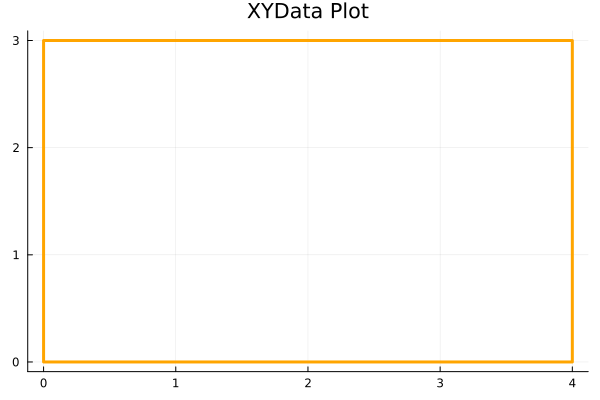

In [19]:
plot(plot_test)

4. Write a function called linearRegression that passes in a XYData object and return the least-squares line
(formulas in the Background section above) as either a named tuple or a new datatype.

In [313]:
function linearRegression(Data::XYData)
    m = Data.vertices[1].x
end

linearRegression (generic function with 1 method)

In [314]:
m=(length(Data)*sum(Data.x*Data.y) - sum(Data.x)*sum(Data.y))/(length(Data.y)*sum(Data.x^2)*(sum(Data.x)^2))
#this is essentially the code for the slope portion, but I can't figure out how to access only the x points or only the y points
#it should be Data.vertices.something else or something along those lines, but I've tried a million combinations, and nothing has worked thus far

LoadError: UndefVarError: Data not defined

In [319]:
b=(sum(Data.vertices.y)-m*sum(Data.vertices.x))/length(Data)
#this will essentially be the intercept portion of our regression, but without being able to access individual x and y I can't check it

LoadError: UndefVarError: Data not defined

In [315]:
v1 = [2,3,5,7,9]

5-element Vector{Int64}:
 2
 3
 5
 7
 9

In [316]:
v2 = [4,5,7,10,15]

5-element Vector{Int64}:
  4
  5
  7
 10
 15

In [317]:
d1 = XYData(v1,v2)

[(2,4),(3,5),(5,7),(7,10),(9,15)]

In [318]:
linearRegression(d1)

2

5. Develop a test suite for this module and test the different constructor methods as well as for any errors that
may be thrown.

6. Add documentation for all constructors and functions in the module.